In [1]:
#import libraries
import seaborn as sns

from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

import matplotlib.pyplot as plt # plotting

import pandas as pd 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import shap

## Load Data

In [2]:
file1 = "/Users/ayadav/Downloads/term-deposit-marketing-2020.csv"

In [3]:
df = pd.read_csv(file1)

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [7]:
df.y.value_counts()

no     37104
yes     2896
Name: y, dtype: int64

In [8]:
df.shape

(40000, 14)

In [9]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

## Data Visualization

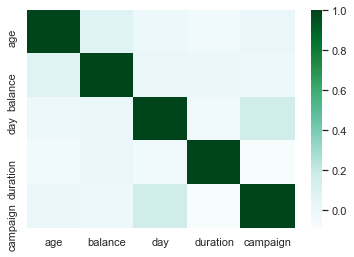

In [10]:
sns.heatmap(df.corr(), cmap='BuGn')

### to visualize all the columns in heatmap, need to label the categorical values and them to number

In [11]:
### label encode the categorical values and convert them to numbers 
le = preprocessing.LabelEncoder()
le.fit(df['job'].astype(str))
df['job'] = le.transform(df['job'].astype(str))

le.fit(df['marital'].astype(str))
df['marital'] = le.transform(df['marital'].astype(str))


le.fit(df['education'].astype(str))
df['education'] = le.transform(df['education'].astype(str))


le.fit(df['default'].astype(str))
df['default'] = le.transform(df['default'].astype(str))


le.fit(df['housing'].astype(str))
df['housing'] = le.transform(df['housing'].astype(str))



le.fit(df['loan'].astype(str))
df['loan'] = le.transform(df['loan'].astype(str))


le.fit(df['contact'].astype(str))
df['contact'] = le.transform(df['contact'].astype(str))


le.fit(df['month'].astype(str))
df['month'] = le.transform(df['month'].astype(str))


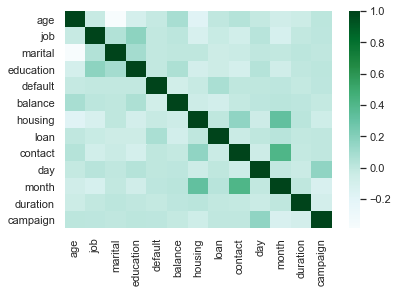

In [12]:
sns.heatmap(df.corr(), cmap='BuGn')

## checking null values

In [13]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [22]:
sns.displot(df, x="default")

AttributeError: module 'seaborn' has no attribute 'displot'

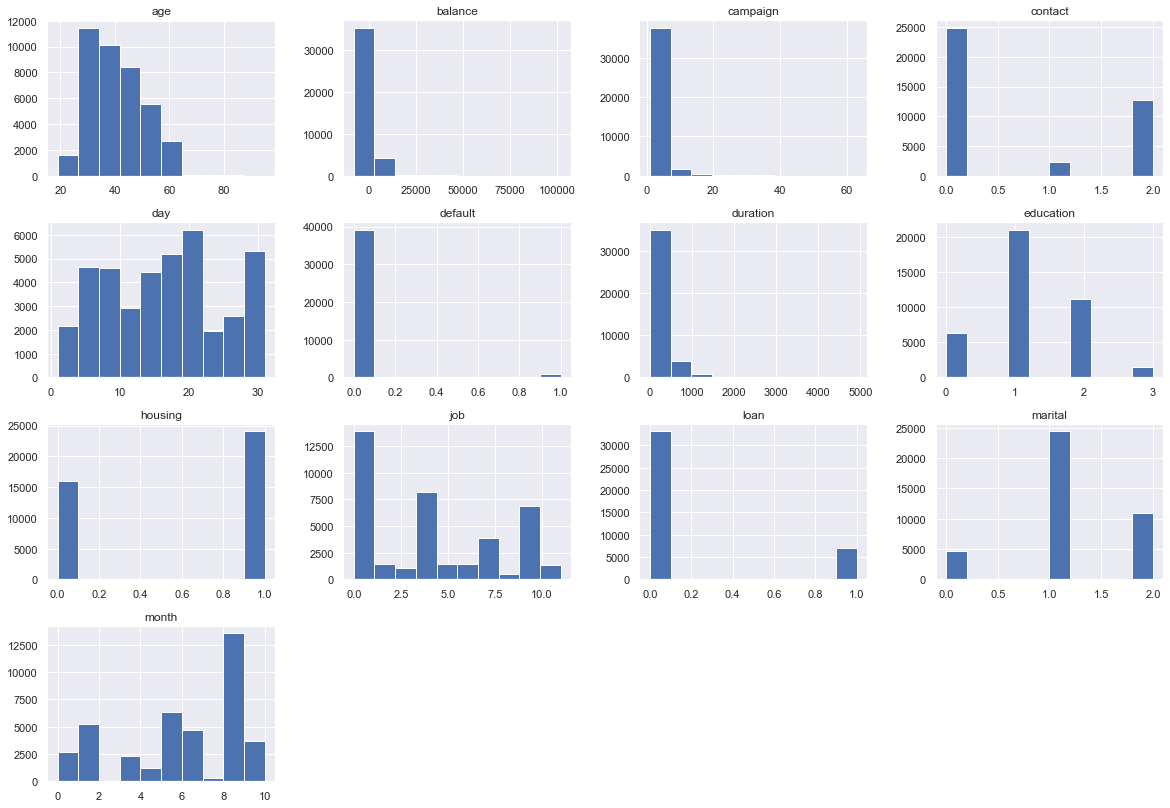

In [23]:
df.hist(figsize=(20,14))
plt.show()

In [24]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

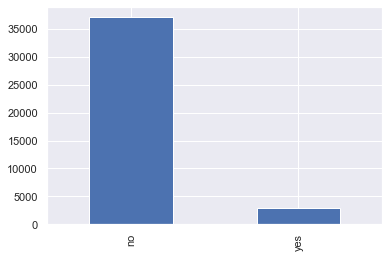

In [25]:
target = df['y']
target.value_counts().plot.bar()

### Data looks pretty imbalance, first we will run the pycaret model on default data sets and hypertune the best model with defult datasets to check the accuracy of model

##  Machine Learning

In [26]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Separate out the features and targets
X = df.drop(columns='y')
y = pd.DataFrame(df['y'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32000, 13)
(8000, 13)
(32000, 1)
(8000, 1)


## Pycaret Module

In [27]:
#load the pycaret module
from pycaret.classification import *
data = df.sample(frac=0.95, random_state=486)
data_unseen = df.drop(df.index)
df.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (38000, 14)
Unseen Data For Predictions: (0, 14)


In [28]:
from pycaret.classification import *
exp_name = setup(data = data,  target = 'y',session_id=123)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"no: 0, yes: 1"
3,Original Data,"(38000, 14)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [29]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.9372,0.9427,0.3644,0.6102,0.4554,0.4244,0.4408,1.9614
1,Light Gradient Boosting Machine,0.9372,0.9464,0.4021,0.5985,0.4799,0.4479,0.4585,0.1761
2,CatBoost Classifier,0.9371,0.9483,0.3943,0.5975,0.4746,0.4427,0.4537,7.3541
3,Extreme Gradient Boosting,0.9354,0.9407,0.4138,0.5729,0.4803,0.4469,0.4537,3.4949
4,Linear Discriminant Analysis,0.9339,0.9291,0.4339,0.5537,0.4858,0.4511,0.4553,0.0989
5,Ridge Classifier,0.9324,0.0000,0.1509,0.6384,0.2428,0.2214,0.2869,0.0136
6,Logistic Regression,0.9322,0.8897,0.2225,0.5829,0.3205,0.2924,0.3311,0.1429
7,Extra Trees Classifier,0.9317,0.9172,0.2193,0.5711,0.3162,0.2877,0.3250,0.3917
8,Random Forest Classifier,0.9315,0.8949,0.2408,0.5616,0.3365,0.3065,0.3376,0.1143
9,Ada Boost Classifier,0.9304,0.9285,0.3207,0.5306,0.3994,0.3648,0.3781,0.5511


### Split data into train and test datasets

In [30]:
X = df.drop(['y'], axis=1)

y = df['y']
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


## Light Gradient boosting Model with default parameter 

In [31]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [32]:
lgb = LGBMClassifier()

In [33]:
from sklearn.model_selection import GridSearchCV
n_estimators=[100,500,1000]
learning_rate=[0.01,0.1,1]
max_depth=[2,3,5]
num_leaves = [8,27, 125]
params2={'n_estimators':n_estimators,'learning_rate':learning_rate,'max_depth':max_depth,'num_leaves':num_leaves}
grid_lgb=GridSearchCV(lgb,param_grid=params2)

In [34]:
### label encode the categorical values and convert them to numbers 
le = preprocessing.LabelEncoder()
le.fit(df['job'].astype(str))
df['job'] = le.transform(df['job'].astype(str))

le.fit(df['marital'].astype(str))
df['marital'] = le.transform(df['marital'].astype(str))


le.fit(df['education'].astype(str))
df['education'] = le.transform(df['education'].astype(str))


le.fit(df['default'].astype(str))
df['default'] = le.transform(df['default'].astype(str))


le.fit(df['housing'].astype(str))
df['housing'] = le.transform(df['housing'].astype(str))



le.fit(df['loan'].astype(str))
df['loan'] = le.transform(df['loan'].astype(str))


le.fit(df['contact'].astype(str))
df['contact'] = le.transform(df['contact'].astype(str))


le.fit(df['month'].astype(str))
df['month'] = le.transform(df['month'].astype(str))


In [35]:
grid_lgb.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_dep

### Light Gradient boosting Model with best parameter

In [36]:
grid_lgb.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000, 'num_leaves': 8}

In [37]:
#X = df.drop(['y'], axis=1)

#y = df['y']
# split data into training and testing sets

#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [38]:
lgbclf=LGBMClassifier(learning_rate=0.01,max_depth=5,n_estimators=1000, num_leaves = 8)
lgbclf.fit(X,y)
print(lgbclf.score(X,y))
print(lgbclf.score(X_train,y_train))
print(lgbclf.score(X_test,y_test))


0.941875
0.9422388059701493
0.9411363636363637


## Feature Selection of imbalanced datasets

In [39]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset
#X = df.drop(['y'], axis=1)

#y = df['y']
# define feature selection
fs = SelectKBest(score_func=f_classif, k=13)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(40000, 13)


In [40]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data
#X = df.drop(['y'], axis=1)

#y = df['y']
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[1.645e+01 1.191e+01 3.658e+01 5.658e+01 1.721e+00 3.659e+01 1.184e+02
 3.855e+01 3.239e+02 1.649e+00 8.534e+01 1.080e+04 6.523e+01]
[[  1   2   8 261]
 [  1   2   8 151]
 [  1   2   8  76]
 [  1   2   8  92]
 [  0   2   8 198]]


(26800, 13)
>10 0.928 (0.000)
>50 0.939 (0.002)
>100 0.938 (0.002)
>500 0.937 (0.003)
>1000 0.936 (0.002)


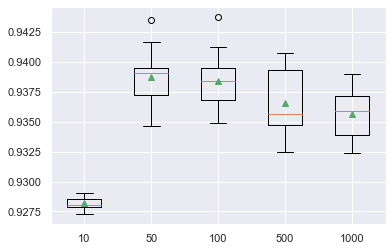

In [50]:
# evaluate lightgbm algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
# Splitting data into training and testing
from sklearn.model_selection import train_test_split
import lightgbm as lgb

# Separate out the features and targets
X = df.drop(columns='y')
y = pd.DataFrame(df['y'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.33, random_state = 42)
print(X_train.shape)
# define the model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
from matplotlib import pyplot
 
 
# get a list of models to evaluate
def get_models():
	models = dict()
	trees = [10, 50, 100, 500, 1000]
	for n in trees:
		models[str(n)] = LGBMClassifier(n_estimators=n)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


In [45]:
# Separate out the features and targets
#X = df.drop(columns='y')
#y = pd.DataFrame(df['y'])


### label encode the categorical values and convert them to numbers 
le = preprocessing.LabelEncoder()
le.fit(df['job'].astype(str))
df['job'] = le.transform(df['job'].astype(str))

le.fit(df['marital'].astype(str))
df['marital'] = le.transform(df['marital'].astype(str))


le.fit(df['education'].astype(str))
df['education'] = le.transform(df['education'].astype(str))


le.fit(df['default'].astype(str))
df['default'] = le.transform(df['default'].astype(str))


le.fit(df['housing'].astype(str))
df['housing'] = le.transform(df['housing'].astype(str))



le.fit(df['loan'].astype(str))
df['loan'] = le.transform(df['loan'].astype(str))


le.fit(df['contact'].astype(str))
df['contact'] = le.transform(df['contact'].astype(str))


le.fit(df['month'].astype(str))
df['month'] = le.transform(df['month'].astype(str))

le.fit(df['y'].astype(str))
df['y'] = le.transform(df['y'].astype(str))


### Now we will balance the data through upscaling and then compare the accuracy between balanced and unbalanced data with best model

In [54]:
from sklearn.utils import resample

# setting up testing and training sets
#X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=27)

#concatenate our training data back together
X1 = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
No = X1[X1.y==0]
Yes = X1[X1.y==1]

# upsample minority
termdeposit_upsampled = resample(Yes,
                          replace=True, # sample with replacement
                          n_samples=len(No), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([No, termdeposit_upsampled])

# check new class counts
upsampled.y.value_counts()

   

1    24868
0    24868
Name: y, dtype: int64

In [55]:
upsampled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
8451,45,11,1,0,0,0,0,0,2,3,9,290,1,0
28293,38,0,1,1,0,-33,0,0,0,29,7,162,1,0
9948,36,0,2,2,0,3819,0,0,2,9,9,398,2,0
32270,56,1,2,1,0,6483,1,0,0,16,0,125,2,0
39564,47,7,1,3,0,8,0,0,1,26,2,164,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31352,43,0,1,1,0,132,0,0,0,17,10,220,1,1
29313,39,3,1,1,0,52,0,0,1,2,6,1420,3,1
33794,66,11,1,0,0,2883,0,0,0,23,0,158,1,1
39982,25,4,2,2,0,1189,0,0,0,3,9,165,1,1


### Load pycaret model on above balance datasets

In [56]:
#load the pycaret module
from pycaret.classification import *
data = upsampled.sample(frac=0.95, random_state=486)
data_unseen = upsampled.drop(upsampled.index)
upsampled.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (47249, 14)
Unseen Data For Predictions: (0, 14)


In [59]:
from pycaret.classification import *
exp_name = setup(data = data,  target = 'y',session_id=123)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(47249, 14)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [60]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extra Trees Classifier,0.9850,0.9998,0.9990,0.9718,0.9852,0.9700,0.9704,0.4545
1,Random Forest Classifier,0.9764,0.9987,0.9987,0.9560,0.9769,0.9528,0.9537,0.1117
2,Decision Tree Classifier,0.9649,0.9649,0.9993,0.9350,0.9661,0.9299,0.9321,0.1159
3,Extreme Gradient Boosting,0.9517,0.9813,0.9920,0.9181,0.9536,0.9035,0.9064,4.6001
4,CatBoost Classifier,0.9432,0.9773,0.9844,0.9095,0.9455,0.8864,0.8894,8.1565
5,Light Gradient Boosting Machine,0.9300,0.9713,0.9751,0.8945,0.9331,0.8601,0.8636,0.2212
6,K Neighbors Classifier,0.9006,0.9512,0.9828,0.8441,0.9081,0.8011,0.8122,0.0543
7,Gradient Boosting Classifier,0.8891,0.9496,0.9125,0.8718,0.8916,0.7781,0.7791,2.4612
8,Ada Boost Classifier,0.8636,0.9316,0.8606,0.8659,0.8632,0.7273,0.7274,0.7154
9,Ridge Classifier,0.8486,0.0000,0.8165,0.8727,0.8436,0.6973,0.6988,0.0174


>50 0.917 (0.002)
>100 0.933 (0.003)
>500 0.966 (0.002)
>1000 0.975 (0.002)


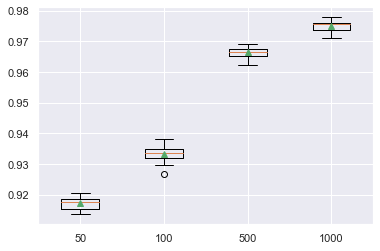

In [61]:
# get a list of models to evaluate
X2 = upsampled.drop(['y'], axis=1)
y2 = pd.DataFrame(upsampled['y'])
def get_models():
	models = dict()
	trees = [ 50, 100, 500, 1000]
	for n in trees:
		models[str(n)] = LGBMClassifier(n_estimators=n)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model,X2, y2, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


In [62]:
lgb = LGBMClassifier()

In [63]:
from sklearn.model_selection import GridSearchCV
n_estimators=[100,500,1000]
learning_rate=[0.01,0.1,1]
max_depth=[2,3,5]
num_leaves = [8,27, 125]
params2={'n_estimators':n_estimators,'learning_rate':learning_rate,'max_depth':max_depth,'num_leaves':num_leaves}
grid_lgb=GridSearchCV(lgb,param_grid=params2)

In [64]:
grid_lgb.fit(X2_train,y2_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_dep

In [65]:
grid_lgb.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 8}

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=27)

In [89]:
lgbclf=LGBMClassifier(learning_rate=0.1,max_depth=5,n_estimators=100, num_leaves = 8)
lgbclf.fit(X2,y2)
print(lgbclf.score(X2,y2))
print(lgbclf.score(X_train,y_train))
print(lgbclf.score(X_test,y_test))

0.8937389416117099
0.8935445820599431
0.8943220202670098


In [94]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
7724,47,1,1,1,0,2775,0,0,2,14,2,262,1
46526,48,10,1,1,0,268,1,0,0,28,8,458,7
41,33,3,1,0,0,6904,0,0,1,20,3,114,2
7355,35,1,0,1,0,52,1,0,2,30,2,574,1
17742,33,1,2,1,0,49,1,0,2,15,2,558,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29989,35,4,1,2,0,387,1,0,0,8,2,1024,3
4848,51,5,1,1,0,428,0,1,0,18,8,145,2
14879,49,9,0,1,0,267,0,0,1,9,6,23,5
36680,25,1,2,1,0,-247,1,0,0,23,8,633,1


## we will see which feature are importancefor prediction for this model. We used SHAP to do so

In [107]:
# DF, based on which importance is checked
X_importance = X_test

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(lgbclf)
shap_values = explainer.shap_values(X_importance)

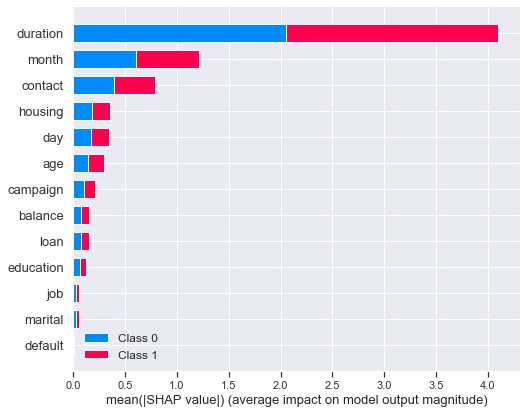

In [108]:
# Plot summary_plot
shap.summary_plot(shap_values, X_importance)

### Feature Selection on balanced dataset

In [95]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset
X = upsampled.drop(['y'], axis=1)

y = upsampled['y']
# define feature selection
fs = SelectKBest(score_func=f_classif, k=13)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)
   

(49736, 13)


In [96]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data
X = upsampled.drop(['y'], axis=1)

y = upsampled['y']
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[7.328e+01 5.450e+00 1.414e+02 3.829e+02 1.724e+00 1.427e+02 7.473e+02
 1.921e+02 1.964e+03 1.695e+00 3.516e+02 2.275e+04 4.238e+02]
[[  0   2 290   1]
 [  0   0 162   1]
 [  0   2 398   2]
 [  1   0 125   2]
 [  0   1 164   1]]


### Age, default, house loan, day, month and campaign are important features for the client.  

In [97]:
upsampled.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

### Accuracy with LGBM model went down from 94%(for imbalanced datasets) to 89%(balanced datasets). 